/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Coefficients: 

Intercept: 1.5918
Coeff- 0: 1.6206


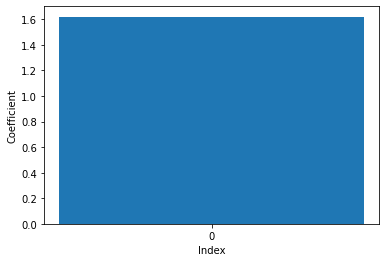


 Mean squared error: 0.0914


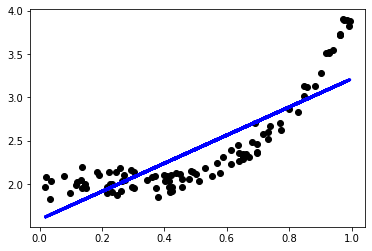

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from numpy import random
np.random.seed(0)

# True Function or Target Function
def gen_target(x):
   return 2 + (2*x**4)

n_records = 500
X = np.sort(np.random.rand(n_records))
y = gen_target(X) + np.random.randn(n_records) * 0.1
X=X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression(fit_intercept=True, normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Coefficients: \n")
print('Intercept: {0:2.4f}'.format(lr.intercept_))
for li , coef in enumerate(lr.coef_):
   print('Coeff-{0:2d}: {1:2.4f}'.format(li, coef))
plt.bar(range(len(lr.coef_)), lr.coef_)
plt.xticks(range(len(lr.coef_)))
plt.xlabel('Index')
plt.ylabel('Coefficient')
plt.show()

print('\n Mean squared error: {:2.4f}'.format(mean_squared_error(y_test, y_pred)))
if X.shape[1] <2:
   plt.figure()
   plt.scatter(X_test, y_test, color="black")
   plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.show()